In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# read multiple csv from data folder
files = []
for file in os.listdir('data'):
    if file.endswith('.csv'):
        files.append(file)
print(files)

['Weather_Data_Germany.csv', 'Prices_Europe.csv', 'Realised_Supply_Germany.csv', 'Installed_Capacity_Germany.csv', 'Reaslised_Demand_Germany.csv']


In [3]:
df = pd.read_csv('data/' + files[0])
df

longitude  latitude      forecast_origin                 time  \
0              5.8      54.2  2019-01-01 00:00:00  2019-01-01 00:00:00   
1              5.8      53.2  2019-01-01 00:00:00  2019-01-01 00:00:00   
2              5.8      52.2  2019-01-01 00:00:00  2019-01-01 00:00:00   
3              5.8      51.2  2019-01-01 00:00:00  2019-01-01 00:00:00   
4              5.8      50.2  2019-01-01 00:00:00  2019-01-01 00:00:00   
...            ...       ...                  ...                  ...   
2104315       14.8      51.2  2021-12-31 00:00:00  2021-12-31 23:00:00   
2104316       14.8      50.2  2021-12-31 00:00:00  2021-12-31 23:00:00   
2104317       14.8      49.2  2021-12-31 00:00:00  2021-12-31 23:00:00   
2104318       14.8      48.2  2021-12-31 00:00:00  2021-12-31 23:00:00   
2104319       14.8      47.2  2021-12-31 00:00:00  2021-12-31 23:00:00   

              cdir            z         msl        blh       tcc        u10  \
0              0.0    -2.766602  102439.914  766.03015  0.304399  11.806978   
1              0.0    -6.159180  102795.230  842.93190  0.945699   6.628730   
2              0.0   478.410160  103077.450  862.93030  0.999504   4.976940   
3              0.0   237.821290  103310.510  619.56150  0.999992   3.810944   
4              0.0  4681.780000  103456.680  385.46838  0.999992   3.689941   
...            ...          ...         ...        ...       ...        ...   
2104315  2835274.0  2180.339400  101831.690  838.02860  1.000008   6.772395   
2104316  3174462.0  1949.363300  102003.055  815.65460  0.981605   5.854994   
2104317  3614996.0  4384.649000  102251.730  741.03357  0.630130   5.271448   
2104318  3894518.0  3073.145500  102469.890  420.26746  0.440941   4.102491   
2104319  4849962.0  9583.732000  102244.875   37.15387  0.035555   1.795015   

              v10        t2m        ssr        tsr       sund        tp  \
0        2.823900  282.04110        0.0        0.0      0.000  0.000000   
1        1.767059  281.28223        0.0        0.0      0.000  0.000000   
2        1.899902  280.48530        0.0        0.0      0.000  0.000000   
3        1.201527  280.26593        0.0        0.0      0.000  0.000000   
4       -0.424220  277.94235        0.0        0.0      0.000  0.000000   
...           ...        ...        ...        ...        ...       ...   
2104315 -0.635157  283.54050  2171042.0  4075276.0  10313.742  0.001773   
2104316  0.206125  284.05286  3600288.0  5727868.0  25293.312  0.000539   
2104317 -1.014326  281.04538  3281948.0  5547652.0  25715.790  0.002406   
2104318 -0.592839  280.20236  4438841.0  6871398.0  27216.710  0.000576   
2104319 -0.220017  273.95093  4189784.0  6439440.0  28799.164  0.000000   

              fsr       u100      v100  
0        0.000860  15.666069  3.153420  
1        0.254992  10.824787  2.401394  
2        0.439765   8.450895  2.586425  
3        0.645616   6.853557  1.614200  
4        0.361133   6.055728 -0.896704  
...           ...        ...       ...  
2104315  0.680833  11.236713 -1.493503  
2104316  0.622661  10.005124 -0.225957  
2104317  0.851062   9.639029 -2.366759  
2104318  0.897962   8.555898 -1.410386  
2104319  1.819780   4.665255 -2.722088  

[2104320 rows x 19 columns]

In [4]:
df_new = df.groupby("time").agg({"ssr":"mean", "u100":"mean", "v100":"mean"}).reset_index()

In [5]:
df_new

time        ssr      u100      v100
0      2019-01-01 00:00:00        0.0  6.545994  1.122055
1      2019-01-01 01:00:00        0.0  6.838839  1.241379
2      2019-01-01 02:00:00        0.0  7.183921  1.428783
3      2019-01-01 03:00:00        0.0  7.660834  1.501984
4      2019-01-01 04:00:00        0.0  8.147790  1.289936
...                    ...        ...       ...       ...
26299  2021-12-31 19:00:00  2401033.1  8.698027  1.518263
26300  2021-12-31 20:00:00  2401033.1  8.648112  1.437886
26301  2021-12-31 21:00:00  2401033.1  8.608811  1.275468
26302  2021-12-31 22:00:00  2401033.1  8.410140  1.149305
26303  2021-12-31 23:00:00  2401033.1  8.213003  1.016589

[26304 rows x 4 columns]

In [6]:
df_new["windspeed"] = np.sqrt(df_new['u100']**2 + df_new['v100']**2)
df_new

time        ssr      u100      v100  windspeed
0      2019-01-01 00:00:00        0.0  6.545994  1.122055   6.641464
1      2019-01-01 01:00:00        0.0  6.838839  1.241379   6.950593
2      2019-01-01 02:00:00        0.0  7.183921  1.428783   7.324626
3      2019-01-01 03:00:00        0.0  7.660834  1.501984   7.806685
4      2019-01-01 04:00:00        0.0  8.147790  1.289936   8.249267
...                    ...        ...       ...       ...        ...
26299  2021-12-31 19:00:00  2401033.1  8.698027  1.518263   8.829541
26300  2021-12-31 20:00:00  2401033.1  8.648112  1.437886   8.766832
26301  2021-12-31 21:00:00  2401033.1  8.608811  1.275468   8.702783
26302  2021-12-31 22:00:00  2401033.1  8.410140  1.149305   8.488307
26303  2021-12-31 23:00:00  2401033.1  8.213003  1.016589   8.275680

[26304 rows x 5 columns]

In [7]:
df_new["timestamps"] = pd.to_datetime(df_new["time"])

In [8]:
df_new_daily = df_new.resample('D', on="timestamps")["ssr","windspeed"].mean().reset_index()
df_new_daily

timestamps           ssr  windspeed
0    2019-01-01  8.151745e+05   9.577244
1    2019-01-02  1.328051e+06   9.004118
2    2019-01-03  1.221792e+06   5.640150
3    2019-01-04  7.074309e+05   6.388635
4    2019-01-05  4.178455e+05   7.452614
...         ...           ...        ...
1091 2021-12-27  1.002687e+06   5.993619
1092 2021-12-28  7.276503e+05   6.701523
1093 2021-12-29  5.386859e+05   5.704000
1094 2021-12-30  5.593633e+05   8.376106
1095 2021-12-31  1.210968e+06   8.603698

[1096 rows x 3 columns]

In [9]:
# plot them
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_new_daily["timestamps"], y=df_new_daily["ssr"], mode='lines', name='ssr'))
fig.add_trace(go.Scatter(x=df_new_daily["timestamps"], y=df_new_daily["windspeed"], mode='lines', name='windspeed'))
fig.show()


In [10]:
df_realized_supply = pd.read_csv('data/' + files[2], sep=';')
df_realized_supply.columns

Index(['Date from', 'Date to', 'Biomass [MW]', 'Hydro Power [MW]',
       'Wind Offshore [MW] ', 'Wind Onshore [MW]', 'Photovoltaic [MW]',
       'Other Renewable [MW]', 'Nuclear Power [MW]', 'Lignite [MW]',
       'Coal [MW]', 'Natural Gas [MW]', 'Pumped Storage [MW]',
       'Other Conventional [MW]'],
      dtype='object')

In [11]:
df_realized_supply

Date from         Date to Biomass [MW] Hydro Power [MW]  \
0       01.01.19 00:00  01.01.19 00:15     1.199,00              401   
1       01.01.19 00:15  01.01.19 00:30     1.203,00           394,75   
2       01.01.19 00:30  01.01.19 00:45     1.204,50           381,25   
3       01.01.19 00:45  01.01.19 01:00     1.208,75              381   
4       01.01.19 01:00  01.01.19 01:15     1.204,50           388,25   
...                ...             ...          ...              ...   
140251  31.12.22 22:45  31.12.22 23:00     1.118,75           308,75   
140252  31.12.22 23:00  31.12.22 23:15     1.111,25           317,75   
140253  31.12.22 23:15  31.12.22 23:30     1.112,25              310   
140254  31.12.22 23:30  31.12.22 23:45     1.109,25            311,5   
140255  31.12.22 23:45  01.01.23 00:00     1.109,75           310,25   

       Wind Offshore [MW]  Wind Onshore [MW] Photovoltaic [MW]  \
0                   794,25          4.839,25                 0   
1                    793,5          5.030,75                 0   
2                   791,75          5.213,50                 0   
3                    754,5          5.308,25                 0   
4                    715,5          5.398,50                 0   
...                    ...               ...               ...   
140251              874,75          7.660,50                 0   
140252               842,5          7.390,25                 0   
140253              852,25          7.356,00                 0   
140254              842,25          7.301,75                 0   
140255              806,75          7.258,00                 0   

       Other Renewable [MW] Nuclear Power [MW] Lignite [MW] Coal [MW]  \
0                      31,5           2.250,50     1.733,00    836,25   
1                      31,5           2.263,25     1.587,75     729,5   
2                      31,5           2.246,00     1.555,25     648,5   
3                      31,5           2.241,75     1.459,00     597,5   
4                      31,5           2.224,50     1.367,75     610,5   
...                     ...                ...          ...       ...   
140251                 30,5             759,75        940,5    551,75   
140252                 30,5             722,25       953,75    549,75   
140253                 30,5              684,5       951,25    552,25   
140254                 30,5             648,25       953,25       551   
140255                 30,5              614,5        956,5     549,5   

       Natural Gas [MW] Pumped Storage [MW] Other Conventional [MW]  
0                 850,5                87,5                  431,75  
1                 821,5               99,25                  429,75  
2                804,75                  44                  431,25  
3                 796,5                  41                   431,5  
4                 765,5                  21                  429,25  
...                 ...                 ...                     ...  
140251              394                  29                  304,25  
140252            385,5                 251                  305,25  
140253           387,25               63,25                  307,75  
140254            391,5               15,25                     307  
140255            385,5               14,25                  307,25  

[140256 rows x 14 columns]

In [12]:
df_realized_supply = df_realized_supply[['Date from', 'Date to', "Photovoltaic [MW]", "Wind Offshore [MW] ", "Wind Onshore [MW]"]]
df_realized_supply.columns

Index(['Date from', 'Date to', 'Photovoltaic [MW]', 'Wind Offshore [MW] ',
       'Wind Onshore [MW]'],
      dtype='object')

In [13]:
df_copy = df_realized_supply.copy()

In [14]:
# df_copy["Wind Onshore [MW]"] = df_copy["Wind Onshore [MW]"].apply(lambda x: x.replace(',', '.'))
df_copy["wind_off"] = df_copy["Wind Offshore [MW] "].str.replace('.', '').str.replace(",",".").astype(float)
df_copy["wind_on"] = df_copy["Wind Onshore [MW]"].str.replace('.', '').str.replace(",",".").astype(float)
df_copy["photo"] = df_copy["Photovoltaic [MW]"].str.replace('.', '').str.replace(",",".").astype(float)





In [15]:
df_copy

Date from         Date to Photovoltaic [MW] Wind Offshore [MW]   \
0       01.01.19 00:00  01.01.19 00:15                 0              794,25   
1       01.01.19 00:15  01.01.19 00:30                 0               793,5   
2       01.01.19 00:30  01.01.19 00:45                 0              791,75   
3       01.01.19 00:45  01.01.19 01:00                 0               754,5   
4       01.01.19 01:00  01.01.19 01:15                 0               715,5   
...                ...             ...               ...                 ...   
140251  31.12.22 22:45  31.12.22 23:00                 0              874,75   
140252  31.12.22 23:00  31.12.22 23:15                 0               842,5   
140253  31.12.22 23:15  31.12.22 23:30                 0              852,25   
140254  31.12.22 23:30  31.12.22 23:45                 0              842,25   
140255  31.12.22 23:45  01.01.23 00:00                 0              806,75   

       Wind Onshore [MW]  wind_off  wind_on  photo  
0               4.839,25    794.25  4839.25    0.0  
1               5.030,75    793.50  5030.75    0.0  
2               5.213,50    791.75  5213.50    0.0  
3               5.308,25    754.50  5308.25    0.0  
4               5.398,50    715.50  5398.50    0.0  
...                  ...       ...      ...    ...  
140251          7.660,50    874.75  7660.50    0.0  
140252          7.390,25    842.50  7390.25    0.0  
140253          7.356,00    852.25  7356.00    0.0  
140254          7.301,75    842.25  7301.75    0.0  
140255          7.258,00    806.75  7258.00    0.0  

[140256 rows x 8 columns]

In [16]:
df_realized_supply

Date from         Date to Photovoltaic [MW] Wind Offshore [MW]   \
0       01.01.19 00:00  01.01.19 00:15                 0              794,25   
1       01.01.19 00:15  01.01.19 00:30                 0               793,5   
2       01.01.19 00:30  01.01.19 00:45                 0              791,75   
3       01.01.19 00:45  01.01.19 01:00                 0               754,5   
4       01.01.19 01:00  01.01.19 01:15                 0               715,5   
...                ...             ...               ...                 ...   
140251  31.12.22 22:45  31.12.22 23:00                 0              874,75   
140252  31.12.22 23:00  31.12.22 23:15                 0               842,5   
140253  31.12.22 23:15  31.12.22 23:30                 0              852,25   
140254  31.12.22 23:30  31.12.22 23:45                 0              842,25   
140255  31.12.22 23:45  01.01.23 00:00                 0              806,75   

       Wind Onshore [MW]  
0               4.839,25  
1               5.030,75  
2               5.213,50  
3               5.308,25  
4               5.398,50  
...                  ...  
140251          7.660,50  
140252          7.390,25  
140253          7.356,00  
140254          7.301,75  
140255          7.258,00  

[140256 rows x 5 columns]

In [17]:
df_copy["wind_on_offshore"] = df_copy["wind_off"] + df_copy["wind_on"]
df_copy


Date from         Date to Photovoltaic [MW] Wind Offshore [MW]   \
0       01.01.19 00:00  01.01.19 00:15                 0              794,25   
1       01.01.19 00:15  01.01.19 00:30                 0               793,5   
2       01.01.19 00:30  01.01.19 00:45                 0              791,75   
3       01.01.19 00:45  01.01.19 01:00                 0               754,5   
4       01.01.19 01:00  01.01.19 01:15                 0               715,5   
...                ...             ...               ...                 ...   
140251  31.12.22 22:45  31.12.22 23:00                 0              874,75   
140252  31.12.22 23:00  31.12.22 23:15                 0               842,5   
140253  31.12.22 23:15  31.12.22 23:30                 0              852,25   
140254  31.12.22 23:30  31.12.22 23:45                 0              842,25   
140255  31.12.22 23:45  01.01.23 00:00                 0              806,75   

       Wind Onshore [MW]  wind_off  wind_on  photo  wind_on_offshore  
0               4.839,25    794.25  4839.25    0.0           5633.50  
1               5.030,75    793.50  5030.75    0.0           5824.25  
2               5.213,50    791.75  5213.50    0.0           6005.25  
3               5.308,25    754.50  5308.25    0.0           6062.75  
4               5.398,50    715.50  5398.50    0.0           6114.00  
...                  ...       ...      ...    ...               ...  
140251          7.660,50    874.75  7660.50    0.0           8535.25  
140252          7.390,25    842.50  7390.25    0.0           8232.75  
140253          7.356,00    852.25  7356.00    0.0           8208.25  
140254          7.301,75    842.25  7301.75    0.0           8144.00  
140255          7.258,00    806.75  7258.00    0.0           8064.75  

[140256 rows x 9 columns]

In [18]:
df_copy = df_copy.drop(columns=["Wind Offshore [MW] ", "Wind Onshore [MW]"])
df_copy = df_copy.drop(columns=["Photovoltaic [MW]"])

In [19]:
df_copy

Date from         Date to  wind_off  wind_on  photo  \
0       01.01.19 00:00  01.01.19 00:15    794.25  4839.25    0.0   
1       01.01.19 00:15  01.01.19 00:30    793.50  5030.75    0.0   
2       01.01.19 00:30  01.01.19 00:45    791.75  5213.50    0.0   
3       01.01.19 00:45  01.01.19 01:00    754.50  5308.25    0.0   
4       01.01.19 01:00  01.01.19 01:15    715.50  5398.50    0.0   
...                ...             ...       ...      ...    ...   
140251  31.12.22 22:45  31.12.22 23:00    874.75  7660.50    0.0   
140252  31.12.22 23:00  31.12.22 23:15    842.50  7390.25    0.0   
140253  31.12.22 23:15  31.12.22 23:30    852.25  7356.00    0.0   
140254  31.12.22 23:30  31.12.22 23:45    842.25  7301.75    0.0   
140255  31.12.22 23:45  01.01.23 00:00    806.75  7258.00    0.0   

        wind_on_offshore  
0                5633.50  
1                5824.25  
2                6005.25  
3                6062.75  
4                6114.00  
...                  ...  
140251           8535.25  
140252           8232.75  
140253           8208.25  
140254           8144.00  
140255           8064.75  

[140256 rows x 6 columns]

In [20]:
df_realized_supply = df_copy

In [21]:
df_realized_supply["timestamps"] = pd.to_datetime(df_realized_supply["Date from"])
df_realized_supply['month_year'] = df_realized_supply['timestamps'].dt.strftime('%Y-%m')
df_realized_supply['day'] = df_realized_supply['timestamps'].dt.strftime('%d')
df_realized_supply["fullhour"] = df_realized_supply['timestamps'].dt.strftime('%H:%M')

/var/folders/hy/0tzp89gx4dg8lszwqth6dv6r0000gn/T/ipykernel_3583/883530119.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [22]:
df_hourly = df_realized_supply.resample('H', on="timestamps")["photo","wind_on_offshore"].mean().reset_index()

df_daily = df_hourly.resample('D', on="timestamps")["photo","wind_on_offshore"].mean().reset_index()



In [23]:
df_hourly

timestamps  photo  wind_on_offshore
0     2019-01-01 00:00:00    0.0         5881.4375
1     2019-01-01 01:00:00    0.0         6308.4375
2     2019-01-01 02:00:00    0.0         6418.3750
3     2019-01-01 03:00:00    0.0         6797.5000
4     2019-01-01 04:00:00    0.0         7244.2500
...                   ...    ...               ...
35059 2022-12-31 19:00:00    0.0         8703.9375
35060 2022-12-31 20:00:00    0.0         8700.3750
35061 2022-12-31 21:00:00    0.0         8655.3750
35062 2022-12-31 22:00:00    0.0         8562.1875
35063 2022-12-31 23:00:00    0.0         8162.4375

[35064 rows x 3 columns]

In [24]:
df_hourly.sort_values(by="timestamps", inplace=True)
df_agg = df_hourly
fig = go.Figure()
x_axis = df_agg["timestamps"]

fig  = px.line(x=x_axis, y=df_agg.photo,
                    )
# title
fig.update_layout(
    title="Average photovoltaic power supply per hour",
    xaxis_title="hour",
    yaxis_title="Power supply [MW]",
)
fig.show()

In [27]:
df_hourly.sort_values(by="timestamps", inplace=True)
df_agg = df_hourly
fig = go.Figure()
x_axis = df_agg["timestamps"]

fig  = px.line(x=x_axis, y=df_agg.wind_on_offshore,
                    )
# title
fig.update_layout(
    title="Average Wind power supply per hour",
    xaxis_title="hour",
    yaxis_title="Wind onshore and offshore power supply [MW]",
)
fig.show()

In [29]:
df_daily.sort_values(by="timestamps", inplace=True)
df_agg = df_daily
fig = go.Figure()
x_axis = df_agg["timestamps"]

fig  = px.line(x=x_axis, y=df_agg.wind_on_offshore,
                    )
# title
fig.update_layout(
    title="Average Wind power supply per day",
    xaxis_title="hour",
    yaxis_title="Wind onshore and offshore power supply [MW]",
)
fig.show()

In [30]:
df_daily.sort_values(by="timestamps", inplace=True)
df_agg = df_daily
fig = go.Figure()
x_axis = df_agg["timestamps"]

fig  = px.line(x=x_axis, y=df_agg.photo,
                    )
# title
fig.update_layout(
    title="Average Wind power supply per day",
    xaxis_title="hour",
    yaxis_title="Wind onshore and offshore power supply [MW]",
)
fig.show()

## Merge 

In [25]:
df_merged_daily = pd.merge(df_new_daily, df_daily, on="timestamps", how="inner")
df_merged_daily

timestamps           ssr  windspeed        photo  wind_on_offshore
0    2019-01-01  8.151745e+05   9.577244   105.117188       8433.377604
1    2019-01-02  1.328051e+06   9.004118   212.200521       3731.273438
2    2019-01-03  1.221792e+06   5.640150   332.018229       2237.031250
3    2019-01-04  7.074309e+05   6.388635  2231.466146       3158.054688
4    2019-01-05  4.178455e+05   7.452614  1947.593750       2895.127604
...         ...           ...        ...          ...               ...
1091 2021-12-27  1.002687e+06   5.993619   239.557292       4344.528646
1092 2021-12-28  7.276503e+05   6.701523   156.252604       5582.416667
1093 2021-12-29  5.386859e+05   5.704000   158.414062       3591.377604
1094 2021-12-30  5.593633e+05   8.376106   148.742188       8371.130208
1095 2021-12-31  1.210968e+06   8.603698   462.802083       8446.075521

[1096 rows x 5 columns]

In [26]:
df_hourly_merged = pd.merge(df_new, df_hourly, on="timestamps", how="inner")
df_hourly_merged

time        ssr      u100      v100  windspeed  \
0      2019-01-01 00:00:00        0.0  6.545994  1.122055   6.641464   
1      2019-01-01 01:00:00        0.0  6.838839  1.241379   6.950593   
2      2019-01-01 02:00:00        0.0  7.183921  1.428783   7.324626   
3      2019-01-01 03:00:00        0.0  7.660834  1.501984   7.806685   
4      2019-01-01 04:00:00        0.0  8.147790  1.289936   8.249267   
...                    ...        ...       ...       ...        ...   
26299  2021-12-31 19:00:00  2401033.1  8.698027  1.518263   8.829541   
26300  2021-12-31 20:00:00  2401033.1  8.648112  1.437886   8.766832   
26301  2021-12-31 21:00:00  2401033.1  8.608811  1.275468   8.702783   
26302  2021-12-31 22:00:00  2401033.1  8.410140  1.149305   8.488307   
26303  2021-12-31 23:00:00  2401033.1  8.213003  1.016589   8.275680   

               timestamps  photo  wind_on_offshore  
0     2019-01-01 00:00:00    0.0         5881.4375  
1     2019-01-01 01:00:00    0.0         6308.4375  
2     2019-01-01 02:00:00    0.0         6418.3750  
3     2019-01-01 03:00:00    0.0         6797.5000  
4     2019-01-01 04:00:00    0.0         7244.2500  
...                   ...    ...               ...  
26299 2021-12-31 19:00:00    0.0         9684.1250  
26300 2021-12-31 20:00:00    0.0         9217.2500  
26301 2021-12-31 21:00:00    0.0         8516.3750  
26302 2021-12-31 22:00:00    0.0         8280.1875  
26303 2021-12-31 23:00:00    0.0         8027.7500  

[26304 rows x 8 columns]

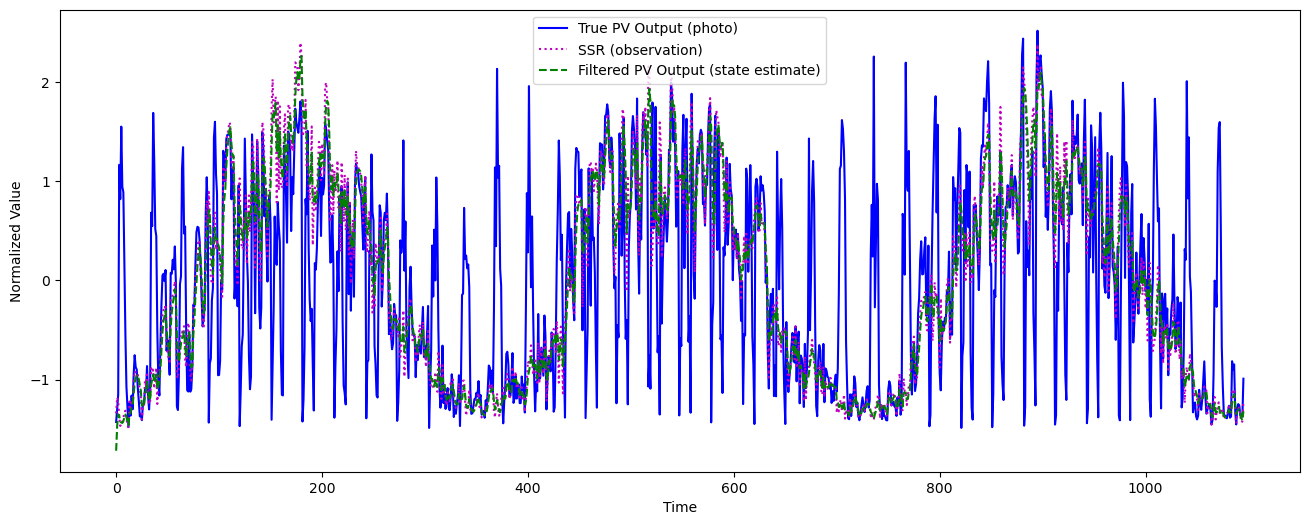

In [33]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

# Load your data into a DataFrame
data = df_merged_daily  # Replace with your actual file path

# Extract the relevant columns
timestamps = data['timestamps']
ssr = data['ssr'].values
photo = data['photo'].values

# Normalize the data
ssr = (ssr - np.mean(ssr)) / np.std(ssr)
photo = (photo - np.mean(photo)) / np.std(photo)

# Prepare matrices
x = photo.reshape(-1, 1)  # Hidden states (photo)
z = ssr.reshape(-1, 1)  # Observations (ssr)

M = len(photo)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True PV Output (photo)')
lines_obs = pl.plot(z, linestyle=':', color='m', label='SSR (observation)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='--', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')
pl.show()


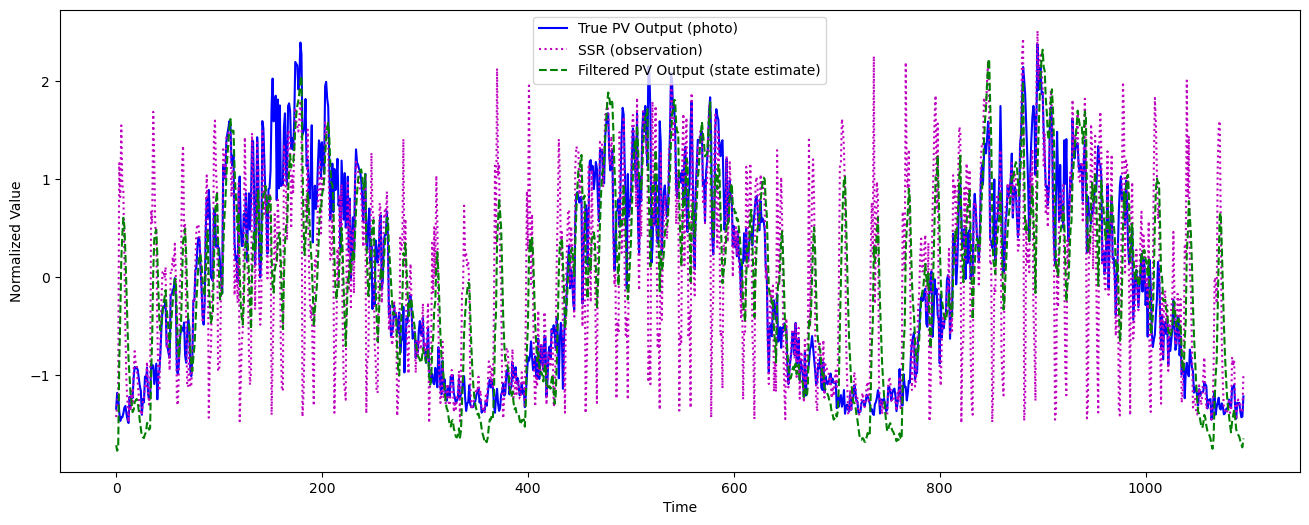

In [36]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

# Load your data into a DataFrame
data = df_merged_daily  # Replace with your actual file path

# Extract the relevant columns
timestamps = data['timestamps']
ssr = data['ssr'].values
photo = data['photo'].values

# Normalize the data
ssr = (ssr - np.mean(ssr)) / np.std(ssr)
photo = (photo - np.mean(photo)) / np.std(photo)

# Prepare matrices
z = photo.reshape(-1, 1)  # Hidden states (photo)
x = ssr.reshape(-1, 1)  # Observations (ssr)

M = len(photo)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True PV Output (photo)')
lines_obs = pl.plot(z, linestyle=':', color='m', label='SSR (observation)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='--', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')
pl.show()


In [30]:
df_hourly_merged.fillna(0, inplace=True)

MAE: 0.0000
MSE: 0.0000
RMSE: 0.0000
R-squared: 1.0000


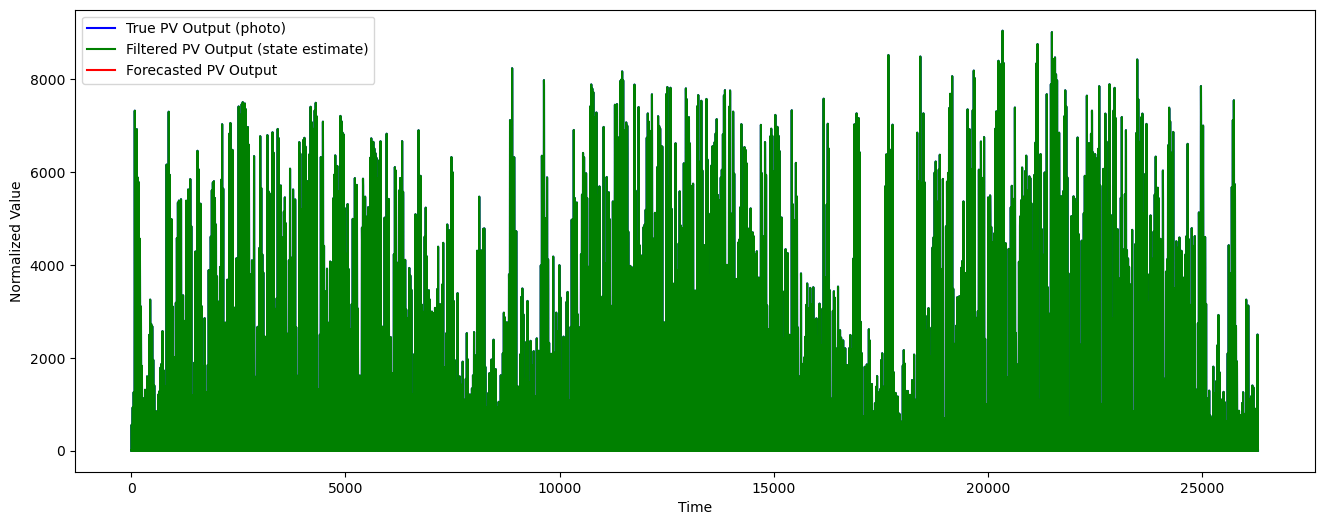

In [35]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data into a DataFrame
data = df_hourly_merged  # Assuming df_merged_daily is your DataFrame

# Extract the relevant columns
timestamps = data['timestamps']
ssr = data['ssr'].values
windspeed = data['windspeed'].values
photo = data['photo'].values

# Normalize the data
# ssr = (ssr - np.mean(ssr)) / np.std(ssr)
# windspeed = (windspeed - np.mean(windspeed)) / np.std(windspeed)
# photo = (photo - np.mean(photo)) / np.std(photo)

# Combine ssr and windspeed into a single observation matrix
z = np.column_stack((ssr, windspeed))

# Prepare the hidden state matrix
x = photo.reshape(-1, 1)

M = len(photo)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(3, 1)  # Adjust to match the dimensions of the combined observation matrix
Q = Q.reshape(3, 3)  # Adjust to match the dimensions of the combined observation matrix

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Calculate evaluation metrics
mae = mean_absolute_error(x, filtered_state_estimates)
mse = mean_squared_error(x, filtered_state_estimates)
rmse = np.sqrt(mse)
r2 = r2_score(x, filtered_state_estimates)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Forecast future values
n_forecasts = 10  # Number of future steps to forecast
last_state = filtered_state_estimates[-1]
forecasts = []

for _ in range(n_forecasts):
    last_state = A @ last_state
    forecasts.append(last_state.item())

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True PV Output (photo)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='-', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')

# Plot forecasts
future_timestamps = range(len(photo), len(photo) + n_forecasts)
pl.plot(future_timestamps, forecasts, linestyle='-', color='r', label='Forecasted PV Output')
pl.legend()
pl.show()


MAE: 0.5883
MSE: 0.8214
RMSE: 0.9063
R-squared: 0.1786


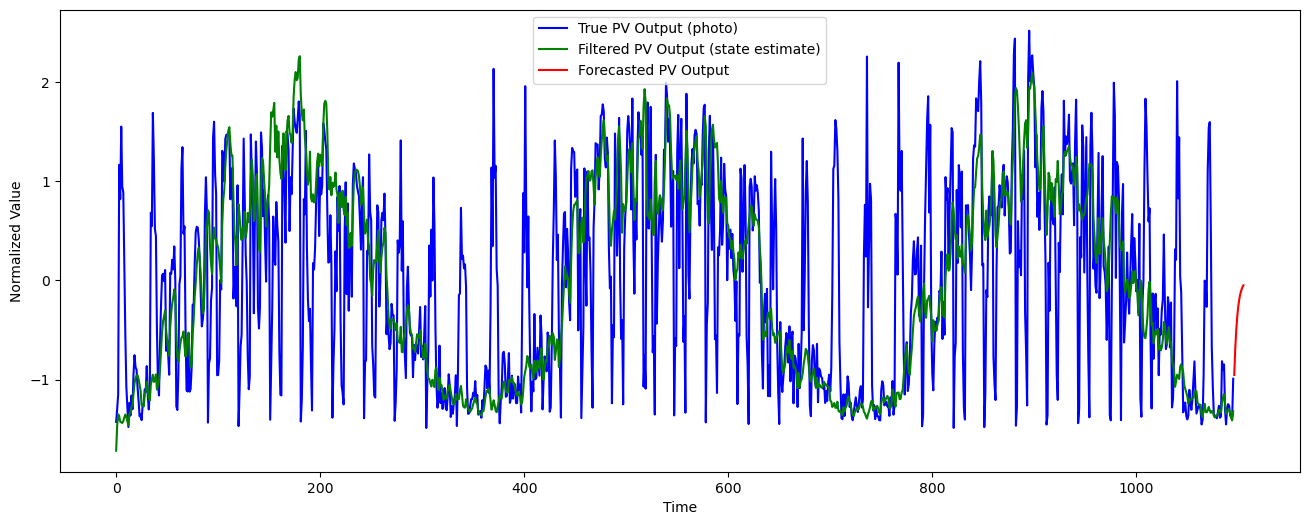

In [28]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data into a DataFrame
data = df_merged_daily

# Extract the relevant columns
timestamps = data['timestamps']
ssr = data['ssr'].values
photo = data['photo'].values

# Normalize the data
ssr = (ssr - np.mean(ssr)) / np.std(ssr)
photo = (photo - np.mean(photo)) / np.std(photo)

# Prepare matrices
x = photo.reshape(-1, 1)  # Hidden states (photo)
z = ssr.reshape(-1, 1)  # Observations (ssr)

## wir könnten noch in z des photo ding reinmachen von dem state davor, aber macht das dann wirklich noch Sinn ? eig schon oder

M = len(photo)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Calculate evaluation metrics
mae = mean_absolute_error(x, filtered_state_estimates)
mse = mean_squared_error(x, filtered_state_estimates)
rmse = np.sqrt(mse)
r2 = r2_score(x, filtered_state_estimates)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Forecast future values
n_forecasts = 10  # Number of future steps to forecast
last_state = filtered_state_estimates[-1]
forecasts = []

for _ in range(n_forecasts):
    last_state = A @ last_state
    forecasts.append(last_state.item())

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True PV Output (photo)')
# lines_obs = pl.plot(z, linestyle=':', color='m', label='SSR (observation)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='-', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')

# Plot forecasts
future_timestamps = range(len(photo), len(photo) + n_forecasts)
pl.plot(future_timestamps, forecasts, linestyle='-', color='r', label='Forecasted PV Output')
pl.legend()
pl.show()


MAE: 2261.9818
MSE: 8440371.0221
RMSE: 2905.2317
R-squared: -1.2119


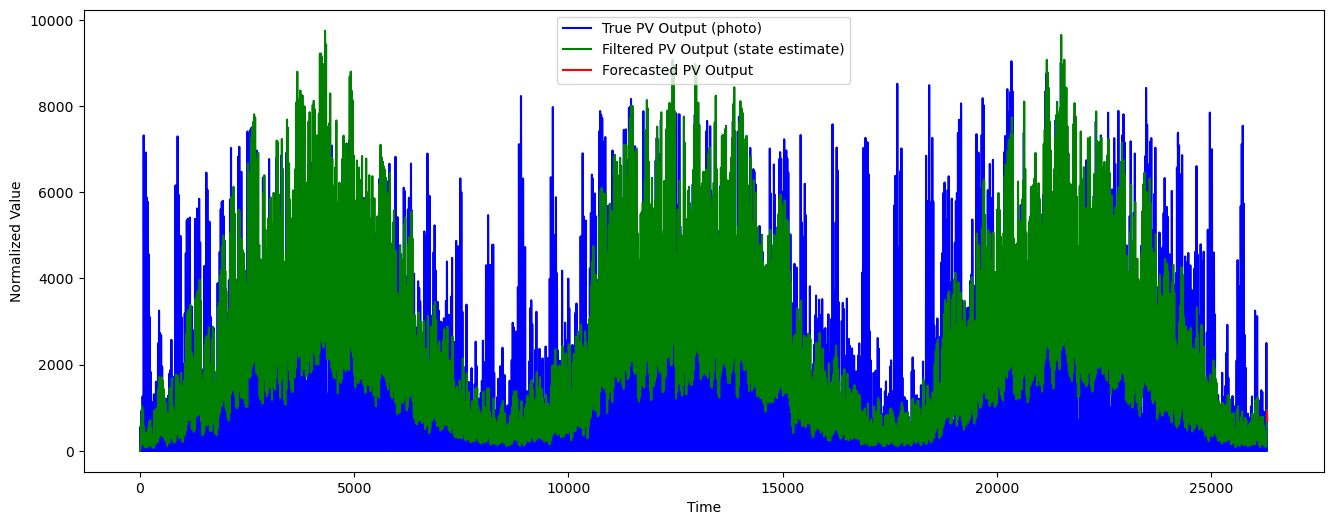

In [46]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df_hourly_merged.fillna(0, inplace=True)
# Load your data into a DataFrame
data = df_hourly_merged

# Extract the relevant columns
timestamps = data['timestamps']
ssr = data['ssr'].values
photo = data['photo'].values

# Normalize the data
# ssr = (ssr - np.mean(ssr)) / np.std(ssr)
# photo = (photo - np.mean(photo)) / np.std(photo)

# Prepare matrices
x = photo.reshape(-1, 1)  # Hidden states (photo)
z = ssr.reshape(-1, 1)  # Observations (ssr)

M = len(photo)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Calculate evaluation metrics
mae = mean_absolute_error(x, filtered_state_estimates)
mse = mean_squared_error(x, filtered_state_estimates)
rmse = np.sqrt(mse)
r2 = r2_score(x, filtered_state_estimates)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Forecast future values
n_forecasts = 10  # Number of future steps to forecast
last_state = filtered_state_estimates[-1]
forecasts = []

for _ in range(n_forecasts):
    last_state = A @ last_state
    forecasts.append(last_state.item())

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True PV Output (photo)')
# lines_obs = pl.plot(z, linestyle=':', color='m', label='SSR (observation)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='-', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')

# Plot forecasts
future_timestamps = range(len(photo), len(photo) + n_forecasts)
pl.plot(future_timestamps, forecasts, linestyle='-', color='r', label='Forecasted PV Output')
pl.legend()
pl.show()


MAE: 0.5997
MSE: 0.7164
RMSE: 0.8464
R-squared: 0.2836


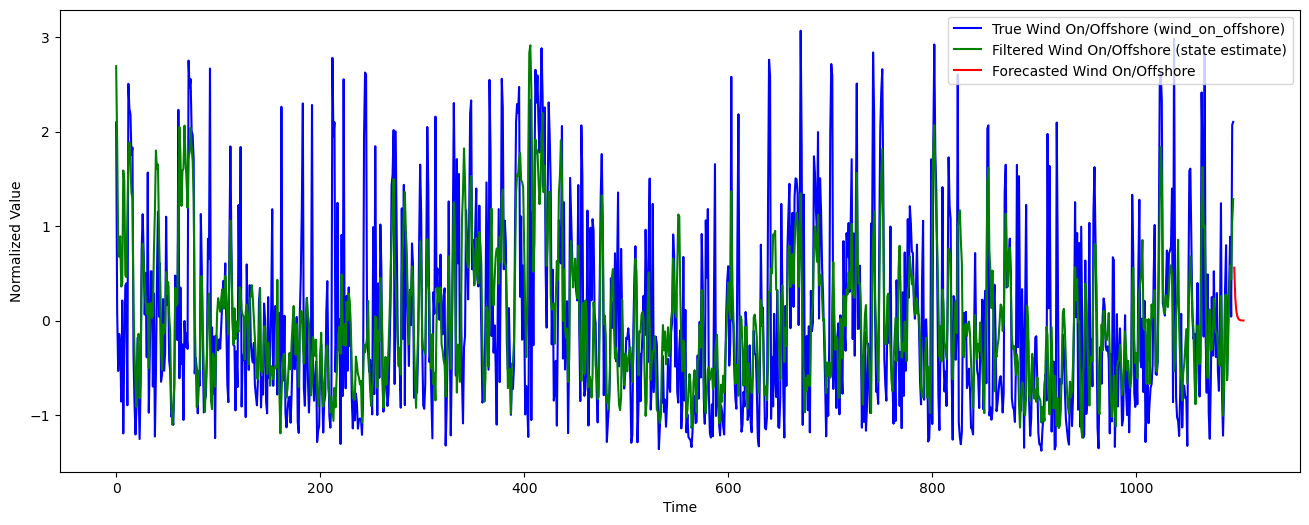

In [36]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data into a DataFrame
data = df_merged_daily # Replace with your actual file path

# Extract the relevant columns
timestamps = data['timestamps']
windspeed = data['windspeed'].values
wind_on_offshore = data['wind_on_offshore'].values

# Normalize the data
windspeed = (windspeed - np.mean(windspeed)) / np.std(windspeed)
wind_on_offshore = (wind_on_offshore - np.mean(wind_on_offshore)) / np.std(wind_on_offshore)

# Prepare matrices
x = wind_on_offshore.reshape(-1, 1)  # Hidden states (wind_on_offshore)
z = windspeed.reshape(-1, 1)  # Observations (windspeed)

M = len(wind_on_offshore)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Calculate evaluation metrics
mae = mean_absolute_error(x, filtered_state_estimates)
mse = mean_squared_error(x, filtered_state_estimates)
rmse = np.sqrt(mse)
r2 = r2_score(x, filtered_state_estimates)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Forecast future values
n_forecasts = 10  # Number of future steps to forecast
last_state = filtered_state_estimates[-1]
forecasts = []

for _ in range(n_forecasts):
    last_state = A @ last_state
    forecasts.append(last_state.item())

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True Wind On/Offshore (wind_on_offshore)')
# lines_obs = pl.plot(z, linestyle=':', color='m', label='Windspeed (observation)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='-', color='g', label='Filtered Wind On/Offshore (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')

# Plot forecasts
future_timestamps = range(len(wind_on_offshore), len(wind_on_offshore) + n_forecasts)
pl.plot(future_timestamps, forecasts, linestyle='-', color='r', label='Forecasted Wind On/Offshore')
pl.legend()
pl.show()


MAE: 0.5861
MSE: 0.6492
RMSE: 0.8057
R-squared: 0.2430


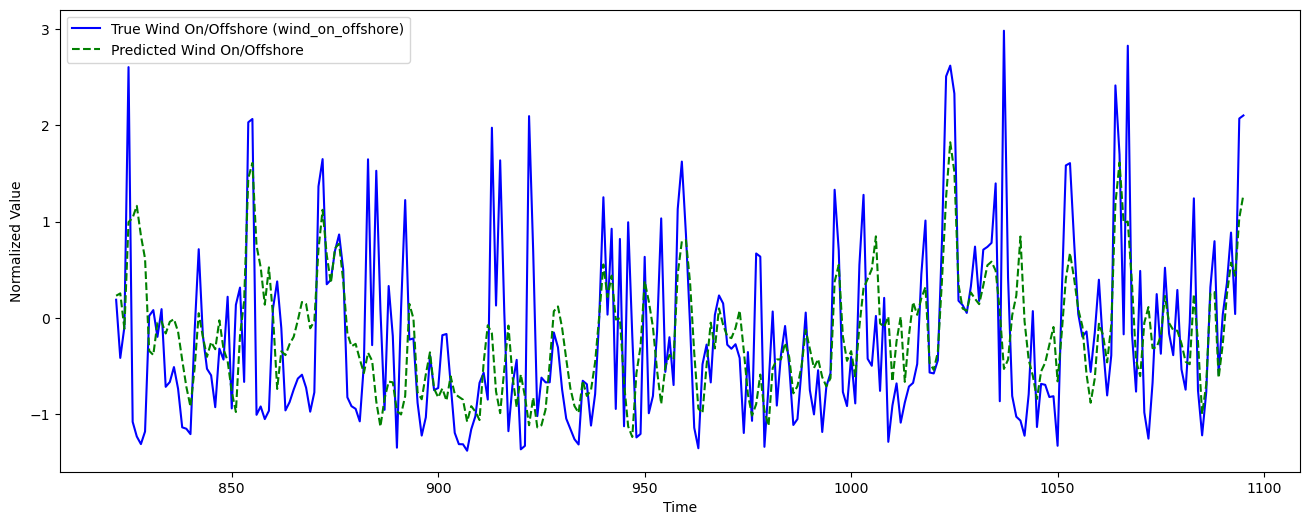

In [42]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data into a DataFrame
data = df_merged_daily  # Replace with your actual file path

# Extract the relevant columns
timestamps = data['timestamps']
windspeed = data['windspeed'].values
wind_on_offshore = data['wind_on_offshore'].values

# Normalize the data
windspeed = (windspeed - np.mean(windspeed)) / np.std(windspeed)
wind_on_offshore = (wind_on_offshore - np.mean(wind_on_offshore)) / np.std(wind_on_offshore)

# Split the data into training (3/4) and testing (1/4)
train_size = int(len(windspeed) * 0.75)
train_windspeed = windspeed[:train_size]
train_wind_on_offshore = wind_on_offshore[:train_size]
test_windspeed = windspeed[train_size:]
test_wind_on_offshore = wind_on_offshore[train_size:]

# Prepare matrices for training
x_train = train_wind_on_offshore.reshape(-1, 1)  # Hidden states (wind_on_offshore)
z_train = train_windspeed.reshape(-1, 1)  # Observations (windspeed)

M = len(x_train)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x_train[1:].T, x_train[:-1]) @ np.linalg.inv(np.dot(x_train[:-1].T, x_train[:-1]))
W = (np.dot(x_train[1:].T, x_train[1:]) - np.dot(A, np.dot(x_train[:-1].T, x_train[1:]))) / (M - 1)
H = np.dot(z_train.T, x_train) @ np.linalg.inv(np.dot(x_train.T, x_train))
Q = (np.dot(z_train.T, z_train) - np.dot(H, np.dot(x_train.T, z_train))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x_train[0],
    initial_state_covariance=np.eye(1)
)

# Perform one-step-ahead predictions on the test set
filtered_state_means = []
predicted_state_means = []

current_state_mean = x_train[-1]
current_state_covariance = np.eye(1)

for t in range(len(test_windspeed)):
    # Predict the next state (one-step-ahead forecast)
    current_state_mean, current_state_covariance = kf.filter_update(
        current_state_mean,
        current_state_covariance,
        observation=test_windspeed[t].reshape(1, 1)
    )
    predicted_state_means.append(current_state_mean[0, 0])
    # Update the filter with the actual observed value
    filtered_state_means.append(test_wind_on_offshore[t])

# Calculate evaluation metrics
mae = mean_absolute_error(filtered_state_means, predicted_state_means)
mse = mean_squared_error(filtered_state_means, predicted_state_means)
rmse = np.sqrt(mse)
r2 = r2_score(filtered_state_means, predicted_state_means)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot results
pl.figure(figsize=(16, 6))
pl.plot(range(train_size, train_size + len(test_windspeed)), filtered_state_means, linestyle='-', color='b', label='True Wind On/Offshore (wind_on_offshore)')
pl.plot(range(train_size, train_size + len(test_windspeed)), predicted_state_means, linestyle='--', color='g', label='Predicted Wind On/Offshore')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')
pl.show()


In [38]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data into a DataFrame
data = df_merged_daily  # Replace with your actual file path

# Extract the relevant columns
timestamps = data['timestamps']
windspeed = data['windspeed'].values
wind_on_offshore = data['wind_on_offshore'].values

# Normalize the data
windspeed = (windspeed - np.mean(windspeed)) / np.std(windspeed)
wind_on_offshore = (wind_on_offshore - np.mean(wind_on_offshore)) / np.std(wind_on_offshore)

# Split the data into training (3/4) and testing (1/4)
train_size = int(len(windspeed) * 0.75)
train_windspeed = windspeed[:train_size]
train_wind_on_offshore = wind_on_offshore[:train_size]
test_windspeed = windspeed[train_size:]
test_wind_on_offshore = wind_on_offshore[train_size:]

# Prepare matrices for training
x_train = train_wind_on_offshore.reshape(-1, 1)  # Hidden states (wind_on_offshore)
z_train = train_windspeed.reshape(-1, 1)  # Observations (windspeed)

M = len(x_train)

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x_train[1:].T, x_train[:-1]) @ np.linalg.inv(np.dot(x_train[:-1].T, x_train[:-1]))
W = (np.dot(x_train[1:].T, x_train[1:]) - np.dot(A, np.dot(x_train[:-1].T, x_train[1:]))) / (M - 1)
H = np.dot(z_train.T, x_train) @ np.linalg.inv(np.dot(x_train.T, x_train))
Q = (np.dot(z_train.T, z_train) - np.dot(H, np.dot(x_train.T, z_train))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize state and covariance
current_state_mean = x_train[-1]
current_state_covariance = np.eye(1)

# Perform one-step-ahead predictions on the test set
filtered_state_means = []
predicted_state_means = []

for t in range(len(test_windspeed)):
    # Extrapolate (Predict)
    # Predict the next state: \hat{\mathbf{x}}_{n+1,n} = \mathbf{F} \hat{\mathbf{x}}_{n,n} + \mathbf{G} \mathbf{u}_n
    predicted_state_mean = A @ current_state_mean
    
    # Predict the next covariance: \mathbf{P}_{n+1,n} = \mathbf{F} \mathbf{P}_{n,n} \mathbf{F}^T + \mathbf{Q}
    predicted_state_covariance = A @ current_state_covariance @ A.T + W
    
    # Save the prediction
    predicted_state_means.append(predicted_state_mean[0])
    
    # Get the current observation
    current_observation = test_windspeed[t].reshape(1, 1)
    
    # Measurement Update (Correct)
    # Compute the Kalman Gain: \mathbf{K}_n = \mathbf{P}_{n,n-1} \mathbf{H}^T (\mathbf{H} \mathbf{P}_{n,n-1} \mathbf{H}^T + \mathbf{R}_n)^{-1}
    S = H @ predicted_state_covariance @ H.T + Q
    K = predicted_state_covariance @ H.T @ np.linalg.inv(S)
    
    # Update the state estimate with measurement: \hat{\mathbf{x}}_{n,n} = \hat{\mathbf{x}}_{n,n-1} + \mathbf{K}_n (\mathbf{z}_n - \mathbf{H} \hat{\mathbf{x}}_{n,n-1})
    current_state_mean = predicted_state_mean + K @ (current_observation - H @ predicted_state_mean)
    
    # Update the estimate uncertainty: \mathbf{P}_{n,n} = (\mathbf{I} - \mathbf{K}_n \mathbf{H}) \mathbf{P}_{n,n-1}
    current_state_covariance = (np.eye(1) - K @ H) @ predicted_state_covariance
    
    # Save the filtered state
    filtered_state_means.append(current_observation[0])

# Calculate evaluation metrics
mae = mean_absolute_error(filtered_state_means, predicted_state_means)
mse = mean_squared_error(filtered_state_means, predicted_state_means)
rmse = np.sqrt(mse)
r2 = r2_score(filtered_state_means, predicted_state_means)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot results
pl.figure(figsize=(16, 6))
pl.plot(range(train_size, train_size + len(test_windspeed)), filtered_state_means, linestyle='-', color='b', label='True Wind On/Offshore (wind_on_offshore)')
pl.plot(range(train_size, train_size + len(test_windspeed)), predicted_state_means, linestyle='--', color='g', label='Predicted Wind On/Offshore')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')
pl.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (274,) + inhomogeneous part.

# Train and test data

In [ ]:
df_train = df_daily.loc[df_daily["timestamps"]<"2021-12-31 23:00:00"]
df_test = df_daily.loc[df_daily["timestamps"]>="2021-12-31 23:00:00"]

In [ ]:
from pykalman import KalmanFilter
import numpy as np
from sklearn.metrics import mean_squared_error

kf = KalmanFilter(n_dim_obs=1,n_dim_state=2,em_vars=['transition_matrices', 'observation_matrices', 'transition_covariance', 'observation_covariance', 'initial_state_mean', 'initial_state_covariance']
                  )
predictions = []
actual = []

train_data = df_daily.loc[df_daily["timestamps"]<"2021-12-31 23:00:00"]
predict_data = df_daily.loc[df_daily["timestamps"]>"2021-12-31 23:00:00"]
kf.em(train_data["photo"], n_iter=300)
for t in range(len(predict_data)):
    oberservation = predict_data["photo"].iloc[t]
    if t%100==0:
        print(f"the obersevation is: {oberservation} at time {t}")
        print(f"Transition Matrix (F):\n{kf.transition_matrices} at time {t}")
        filtered_state_means, filtered_state_covariances = kf.filter(oberservation)
        forecasted_state_mean = np.dot(kf.transition_matrices, filtered_state_means[-1])
        forecasted_value = forecasted_state_mean[0]
        print(f"Forecasted value: {forecasted_value} at time {t}")
        print(f"Filtered state mean: {filtered_state_means[-1]} at time {t}")
        print(f"Filtered state covariances: {filtered_state_covariances[-1]} at time {t}")
        print(f"Init state mean{kf.initial_state_mean} at time {t}")
        
        
    prediction_state_mean, _ = kf.filter_update(kf.initial_state_mean, kf.initial_state_covariance, oberservation)
    kf.filter
    predictions.append(prediction_state_mean[0])
    if t%100==0:
        print(f"This is the prediction: {prediction_state_mean[0]} at time {t}")
        print("-------------------------\n")
    actual.append(oberservation)
    
    
    
rmse = np.sqrt(mean_squared_error(actual, predictions))

print(f"RMSE: {rmse}")

notmup-3zigci-bisFeg

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(predict_data.index, actual, label='Actual')
plt.plot(predict_data.index, predictions, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Onshore')
plt.title('Actual vs Predicted Wind Onshore (2022)')
plt.legend()
plt.show()

In [ ]:
from pykalman import KalmanFilter
import numpy as np
from sklearn.metrics import mean_squared_error

kf = KalmanFilter(n_dim_obs=1,n_dim_state=5,em_vars=['transition_matrices', 'observation_matrices', 'transition_covariance', 'observation_covariance', 'initial_state_mean', 'initial_state_covariance']
                  )
predictions = []
actual = []

train_data = df_daily.loc[df_daily["timestamps"]<"2021-12-31 23:00:00"]
predict_data = df_daily.loc[df_daily["timestamps"]>"2021-12-31 23:00:00"]
kf.em(train_data["photo"], n_iter=300)
for t in range(len(predict_data)):
    observation = predict_data['photo'].iloc[t]
    
    # Use filter() to get the filtered state estimates up to current time t
    filtered_state_means, filtered_state_covariances = kf.filter(observation)
    
    # Use filter_update() to update state estimate with current observation
    prediction_state_mean, _ = kf.filter_update(filtered_state_means[-1], filtered_state_covariances[-1], observation)
    
    # Store prediction and actual value for comparison
    predictions.append(prediction_state_mean[0])
    actual.append(observation)
    
    # print information
    if t%100==0:
        print(f"the obersevation is: {observation} at time {t}")
        print(f"Transition Matrix (F):\n{kf.transition_matrices} at time {t}")
        print(f"Forecasted value: {prediction_state_mean[0]} at time {t}")
        print(f"Filtered state mean: {filtered_state_means[-1]} at time {t}")
        print(f"Filtered state covariances: {filtered_state_covariances[-1]} at time {t}")
        print(f"Init state mean{kf.initial_state_mean} at time {t}")
        print("-------------------------\n")
        

    
    
    
    
rmse = np.sqrt(mean_squared_error(actual, predictions))

print(f"RMSE: {rmse}")

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(predict_data.index, actual, label='Actual')
plt.plot(predict_data.index, predictions, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Onshore')
plt.title('Actual vs Predicted Wind Onshore (2022)')
plt.legend()
plt.show()

In [ ]:
df_train

In [ ]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

# Example data (replace with your actual data)
np.random.seed(42)  # For reproducibility
n_timesteps = 100
solar_radiation = np.random.rand(n_timesteps)  # Simulated solar radiation data
pv_output = 2 * solar_radiation + np.random.randn(n_timesteps) * 0.1  # Simulated photovoltaic output data

# Normalize the data
solar_radiation = (solar_radiation - np.mean(solar_radiation)) / np.std(solar_radiation)
pv_output = (pv_output - np.mean(pv_output)) / np.std(pv_output)

# Prepare matrices
x = df
z = solar_radiation.reshape(-1, 1)  # Observations (solar radiation)

M = n_timesteps

# Estimate A, W, H, Q using the closed-form solutions
A = np.dot(x[1:].T, x[:-1]) @ np.linalg.inv(np.dot(x[:-1].T, x[:-1]))
W = (np.dot(x[1:].T, x[1:]) - np.dot(A, np.dot(x[:-1].T, x[1:]))) / (M - 1)
H = np.dot(z.T, x) @ np.linalg.inv(np.dot(x.T, x))
Q = (np.dot(z.T, z) - np.dot(H, np.dot(x.T, z))) / M

# Convert to correct shapes
A = A.reshape(1, 1)
W = W.reshape(1, 1)
H = H.reshape(1, 1)
Q = Q.reshape(1, 1)

# Initialize Kalman Filter with estimated parameters
kf = KalmanFilter(
    transition_matrices=A,
    observation_matrices=H,
    transition_covariance=W,
    observation_covariance=Q,
    initial_state_mean=x[0],
    initial_state_covariance=np.eye(1)
)

# Filter the observations to estimate the states
filtered_state_estimates = kf.filter(z)[0]

# Plot results
pl.figure(figsize=(16, 6))
lines_true = pl.plot(x, linestyle='-', color='b', label='True PV Output (hidden state)')
lines_obs = pl.plot(z, linestyle=':', color='m', label='Solar Radiation (observation)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='--', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Normalized Value')
pl.show()


In [ ]:
data

In [ ]:
data.observations

In [ ]:
data.states

In [ ]:
import numpy as np
import pylab as pl
from pykalman.datasets import load_robot
from pykalman import KalmanFilter

# Load data (we'll only use data.observations for this example)
data = load_robot()

# Define dimensions
n_dim_state = data.transition_matrix.shape[0]  # State dimension
n_dim_obs = data.observation_matrix.shape[0]   # Observation dimension

# Initialize with random values
np.random.seed(42)  # For reproducibility
transition_matrix = np.random.randn(n_dim_state, n_dim_state)
observation_matrix = np.random.randn(n_dim_obs, n_dim_state)
transition_covariance = np.eye(n_dim_state)  # Identity matrix for simplicity
observation_covariance = np.eye(n_dim_obs)   # Identity matrix for simplicity
transition_offsets = np.random.randn(n_dim_state)
observation_offset = np.random.randn(n_dim_obs)
initial_state_mean = np.random.randn(n_dim_state)
initial_state_covariance = np.eye(n_dim_state)  # Identity matrix for simplicity

# Initialize Kalman Filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance,
    transition_offsets=transition_offsets,
    observation_offsets=observation_offset,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    em_vars=[
        'transition_matrices', 'observation_matrices',
        'transition_covariance', 'observation_covariance',
        'observation_offsets', 'initial_state_mean',
        'initial_state_covariance'
    ]
)

# Learn good values for parameters named in `em_vars` using the EM algorithm
loglikelihoods = np.zeros(10)
for i in range(len(loglikelihoods)):
    kf = kf.em(X=data.observations, n_iter=1)
    loglikelihoods[i] = kf.loglikelihood(data.observations)

# Estimate the state without using any observations (blind estimation)
n_timesteps = data.observations.shape[0]
blind_state_estimates = np.zeros((n_timesteps, n_dim_state))
for t in range(n_timesteps - 1):
    if t == 0:
        blind_state_estimates[t] = kf.initial_state_mean
    blind_state_estimates[t + 1] = (
        np.dot(kf.transition_matrices, blind_state_estimates[t])
        + kf.transition_offsets
    )

# Estimate the hidden states using observations up to and including time t
filtered_state_estimates = kf.filter(data.observations)[0]

# Estimate the hidden states using all observations
smoothed_state_estimates = kf.smooth(data.observations)[0]

# Plot the true, blind, filtered, and smoothed state estimates
pl.figure(figsize=(16, 6))
lines_true = pl.plot(data.states, linestyle='-', color='b')
lines_blind = pl.plot(blind_state_estimates, linestyle=':', color='m')
# lines_filt = pl.plot(filtered_state_estimates, linestyle='--', color='g')
lines_smooth = pl.plot(smoothed_state_estimates, linestyle='-.', color='r')
pl.legend(
    (lines_true[0], lines_blind[0], lines_filt[0], lines_smooth[0]),
    ('true', 'blind', 'filtered', 'smoothed')
)
pl.xlabel('time')
pl.ylabel('state')
pl.xlim(xmax=500)

# Draw log likelihood of observations as a function of EM iteration number.
# Notice how it is increasing (this is guaranteed by the EM algorithm)
pl.figure()
pl.plot(loglikelihoods)
pl.xlabel('em iteration number')
pl.ylabel('log likelihood')
pl.show()


In [ ]:
data.observation_matrix

In [ ]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

# Example data (replace with your actual data)
np.random.seed(42)  # For reproducibility
n_timesteps = 100
solar_radiation = np.random.rand(n_timesteps)  # Simulated solar radiation data
pv_output = 2 * np.random.rand(n_timesteps) + np.random.randn(n_timesteps) * 0.1  # Simulated photovoltaic output data

# Dimensions
n_dim_state = 1  # We assume the state is one-dimensional (PV output)
n_dim_obs = 1  # We assume the observation is one-dimensional (solar radiation)

# Random initialization
transition_matrix = np.eye(n_dim_state)  # F: Identity matrix for state transition
observation_matrix = np.random.randn(n_dim_obs, n_dim_state)  # H: Random initialization
initial_state_mean = np.random.randn(n_dim_state)  # Initial state
initial_state_covariance = np.eye(n_dim_state)  # Initial state covariance
transition_covariance = np.eye(n_dim_state)  # Q: Process noise covariance
observation_covariance = np.eye(n_dim_obs)  # R: Measurement noise covariance
transition_offsets = np.zeros(n_dim_state)  # Transition offsets
observation_offset = np.zeros(n_dim_obs)  # Observation offsets

# Initialize Kalman Filter with random parameters
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance,
    transition_offsets=transition_offsets,
    observation_offsets=observation_offset,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance,
    em_vars=[
        'transition_matrices', 'observation_matrices',
        'transition_covariance', 'observation_covariance',
        'observation_offsets', 'initial_state_mean',
        'initial_state_covariance'
    ]
)

# Observations are the solar radiation data
observations = solar_radiation.reshape(-1, 1)

# Estimate parameters using EM algorithm
loglikelihoods = np.zeros(140)
for i in range(len(loglikelihoods)):
    kf = kf.em(X=observations, n_iter=1)
    loglikelihoods[i] = kf.loglikelihood(observations)

# Filtering
filtered_state_estimates = kf.filter(observations)[0]
print(f"Transtition matrix: {kf.transition_matrices}")
print(f"Observatuib matrix: {kf.observation_matrices}")

# Plot results
pl.figure(figsize=(16, 6))
line_true = pl.plot(pv_output, linestyle='-', color='r', label='True values')
lines_obs = pl.plot(observations, linestyle='-', color='b', label='Solar Radiation (observations)')
lines_filt = pl.plot(filtered_state_estimates, linestyle='--', color='g', label='Filtered PV Output (state estimate)')
pl.legend()
pl.xlabel('Time')
pl.ylabel('Value')
pl.show()

# Plot log likelihoods
pl.figure()
pl.plot(loglikelihoods)
pl.xlabel('EM iteration number')
pl.ylabel('Log likelihood')
pl.show()


In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.models import KalmanForecaster
from darts.metrics import mape
from darts.metrics.metrics import rmse, mae, r2_score

In [ ]:
df_train = df_hourly.loc[df_hourly["timestamps"]<="2021-12-31 23:00:00"]
df_test = df_hourly.loc[df_hourly["timestamps"]>"2021-12-31 23:00:00"]
df_test.fillna(0, inplace=True)
df_train.fillna(0, inplace=True)

In [ ]:
df_test

In [ ]:



series = TimeSeries.from_dataframe(df_train, "timestamps", ["photo"])
series_test = TimeSeries.from_dataframe(df_test, "timestamps", ["photo"])

model = KalmanForecaster(dim_x=60)
model.fit(series)




In [ ]:
forecast = model.predict(10)
# Validation




plt.figure(figsize=(10, 6))
series.plot(label='train')
series_test.plot(label='test_vals')
forecast.plot(label='Forecast')

plt.legend()
plt.title('Kalman Filter Forecast using N4SID')
plt.show()